c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\google\auth\_default.py:78: UserWarning:

Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 



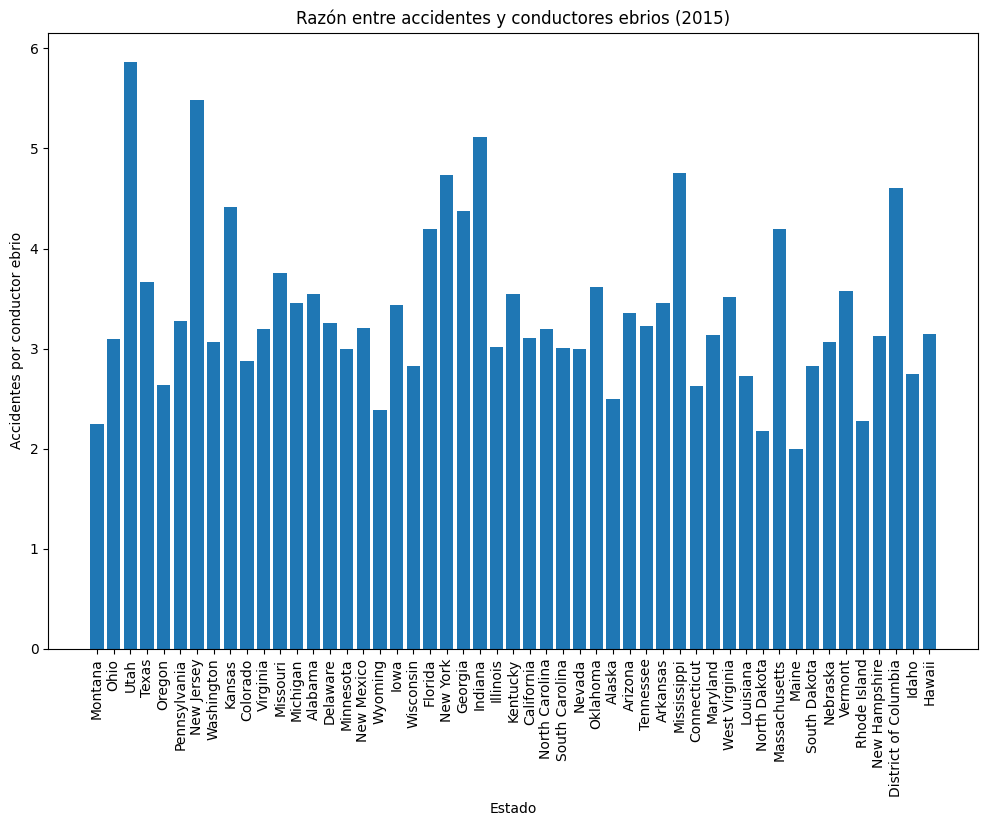

In [8]:
import pandas as pd
from google.cloud import bigquery
import matplotlib.pyplot as plt

client = bigquery.Client(project='poto-382221')

# Hacer la consulta a BigQuery
query = """
SELECT 
    state_name,
    COUNT(*) AS num_accidents,
    SUM(number_of_drunk_drivers) AS num_drunk_drivers
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY state_name
"""

# Ejecutar la consulta
query_job = client.query(query)
results = query_job.result()

# Convertir los resultados a un dataframe de Pandas
results_df = results.to_dataframe()

# Calcular la razón entre número de accidentes y conductores ebrios
results_df['accidents_per_drunk_driver'] = results_df['num_accidents'] / results_df['num_drunk_drivers']

# Crear la figura de barras
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(results_df['state_name'], results_df['accidents_per_drunk_driver'])

# Establecer la rotación de las etiquetas del eje x a 90 grados
plt.xticks(rotation=90)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Razón entre accidentes y conductores ebrios (2015)')
ax.set_xlabel('Estado')
ax.set_ylabel('Accidentes por conductor ebrio')

# Mostrar la figura
plt.show()


El gráfico generado muestra que hay una gran variabilidad en la relación entre el número de accidentes y el número de conductores ebrios en los diferentes estados de Estados Unidos.

En algunos estados, como Montana, Dakota del Norte y Carolina del Sur, la relación es muy alta, lo que indica una mayor proporción de accidentes causados por conductores ebrios. En otros estados, como Hawái y Rhode Island, la relación es bastante baja, lo que sugiere que los accidentes no están tan relacionados con la conducción bajo la influencia del alcohol.

El siguiente s el codigo interactivo

In [9]:
import plotly.express as px
import pandas as pd
from google.cloud import bigquery
client = bigquery.Client(project='poto-382221')

# Hacer la consulta a BigQuery
query = """
SELECT 
    state_name,
    COUNT(*) AS num_accidents,
    SUM(number_of_drunk_drivers) AS num_drunk_drivers
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY state_name
"""

# Ejecutar la consulta
query_job = client.query(query)
results = query_job.result()

# Convertir los resultados a un dataframe de Pandas
results_df = results.to_dataframe()

# Calcular la razón entre número de accidentes y conductores ebrios
results_df['accidents_per_drunk_driver'] = results_df['num_accidents'] / results_df['num_drunk_drivers']

# Crear la figura de barras
fig = px.bar(results_df, x='state_name', y='accidents_per_drunk_driver')

# Mostrar la figura
fig.show()

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\google\auth\_default.py:78: UserWarning:

Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 

